# Simulation for f(u,v)=ku(1-u),g(u,v)=-v^2+u for k=0.3(Reaction-Diffusion Model)


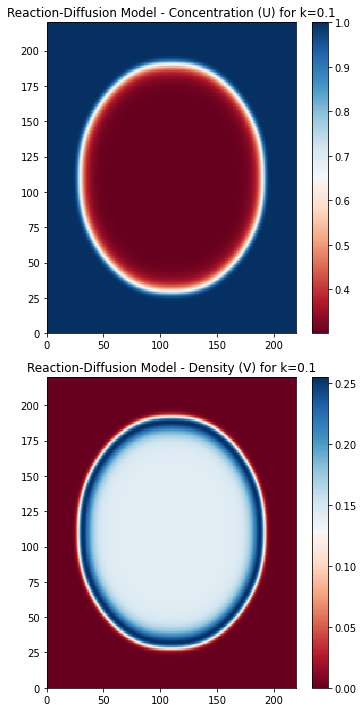

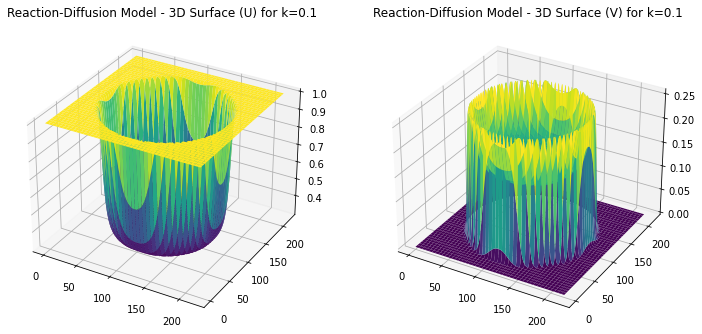

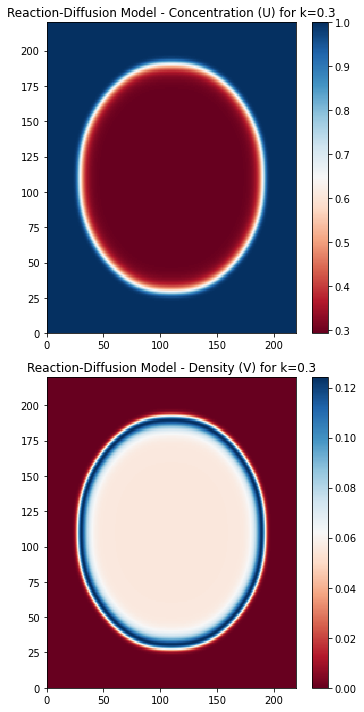

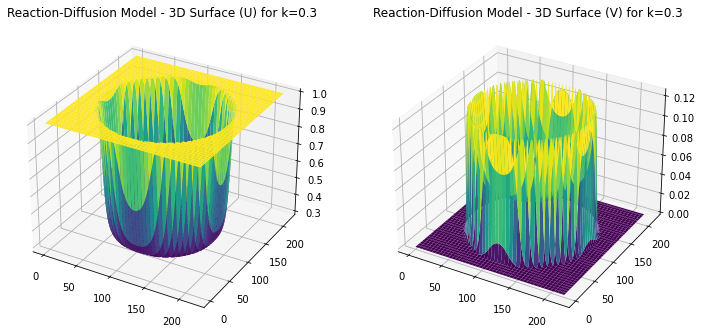

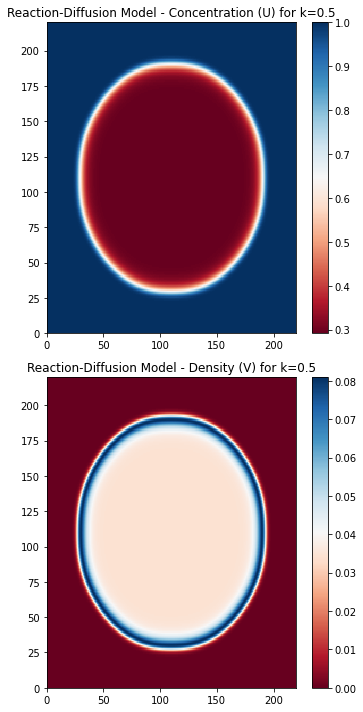

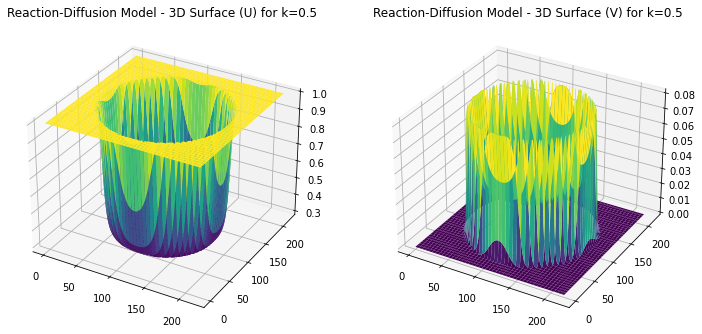

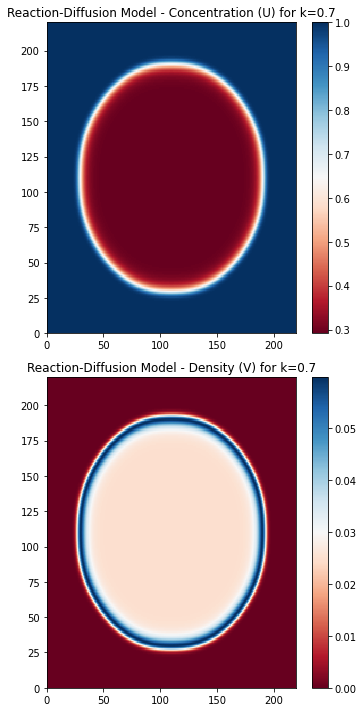

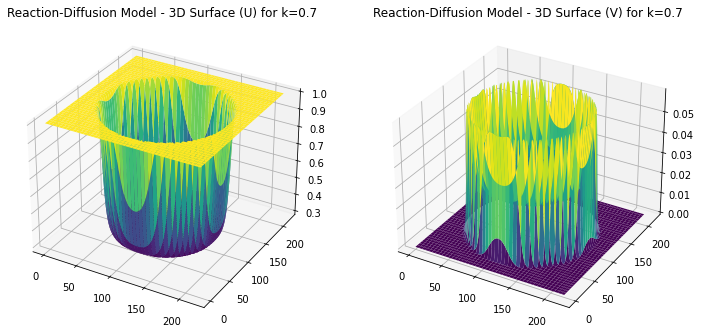

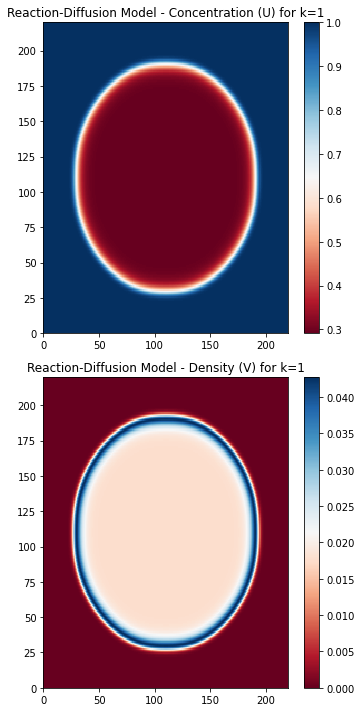

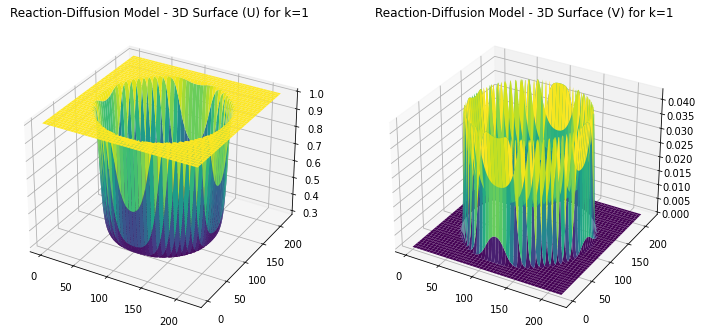

In [166]:
import numpy as np
import matplotlib.pyplot as plt

# Functions
def model_start(nx, ny):
    # Initial conditions
    u = np.ones((nx, ny))
    v = np.zeros((nx, ny))
    
    # Grid
    x, y = np.meshgrid(np.linspace(0, 1, nx), np.linspace(0, 1, ny))

    mask = (0.45 < x) & (x < 0.55) & (0.45 < y) & (y < 0.55)
    
    u[mask] = 0.50
    v[mask] = 0.25
        
    return u, v

def f1(u, v, k=0.3):
    return k * u * (1 - u)

def g1(u, v):
    return -v**2 + u

def periodic_bc(u):
    u[0, :] = u[-2, :]
    u[-1, :] = u[1, :]
    u[:, 0] = u[:, -2]
    u[:, -1] = u[:, 1]

def five_point_scheme(u):
    return (u[:-2, 1:-1] + u[1:-1, :-2] - 4*u[1:-1, 1:-1] + u[1:-1, 2:] + u[2:, 1:-1])

def integrate_model(U, V, params, f, g):
    dt, nu1, nu2, F, k = params
    
    u, v = U[1:-1, 1:-1], V[1:-1, 1:-1]
    
    Lu = five_point_scheme(U)
    Lv = five_point_scheme(V)
    
    uvv = f(u, v) * g(u, v)
    u += dt * (nu1 * Lu - uvv + F * (1 - u))
    v += dt * (nu2 * Lv + uvv - (F + k) * v)
    
    periodic_bc(U)
    periodic_bc(V)

# Loop over different values of k
k_values = [0.1, 0.3, 0.5, 0.7, 1]  # Add more values as needed

for k in k_values:
    params = np.array([0.5, 0.15, 0.055, 0.02545, k])
    U, V = model_start(220, 220)

    for t in range(400):
        integrate_model(U, V, params, f1, g1)

    V_scaled = np.uint8(255 * (V - V.min()) / (V.max() - V.min()))

    plt.figure(figsize=(5, 10))
    plt.subplot(2, 1, 1)
    plt.pcolormesh(U, cmap='RdBu')
    plt.title(f'Reaction-Diffusion Model - Concentration (U) for k={k}')
    plt.colorbar()

    plt.subplot(2, 1, 2)
    plt.pcolormesh(V, cmap='RdBu')
    plt.title(f'Reaction-Diffusion Model - Density (V) for k={k}')
    plt.colorbar()

    plt.tight_layout()
    plt.show()

    # 3D Surface Plots
    fig = plt.figure(figsize=(12, 6))

    # Concentration (U) - 3D Surface Plot
    ax1 = fig.add_subplot(1, 2, 1, projection='3d')
    x, y = np.meshgrid(np.arange(U.shape[0]), np.arange(U.shape[1]))
    ax1.plot_surface(x, y, U, cmap='viridis')
    ax1.set_title(f'Reaction-Diffusion Model - 3D Surface (U) for k={k}')

    # Density (V) - 3D Surface Plot
    ax2 = fig.add_subplot(1, 2, 2, projection='3d')
    ax2.plot_surface(x, y, V, cmap='viridis')
    ax2.set_title(f'Reaction-Diffusion Model - 3D Surface (V) for k={k}')

    plt.show()


# Simulation for f(u,v)=kA-(B+1)u+u^2v, g(u,v)=Bu-u^2v for A=5,B=0.003(Reaction-Diffusion Model) 


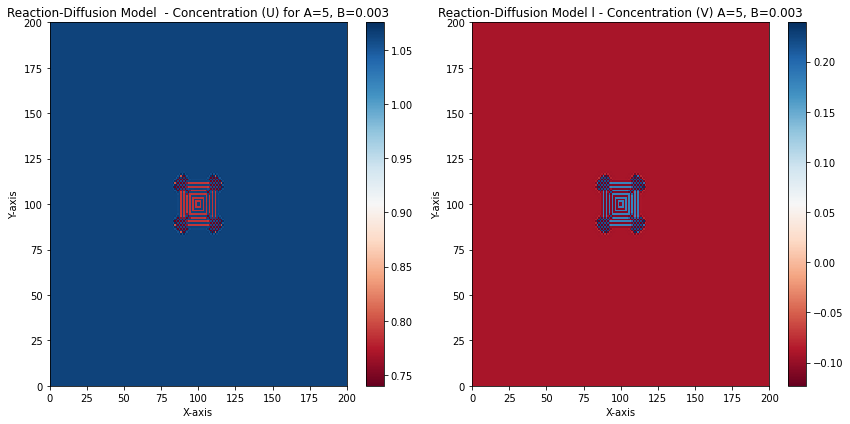

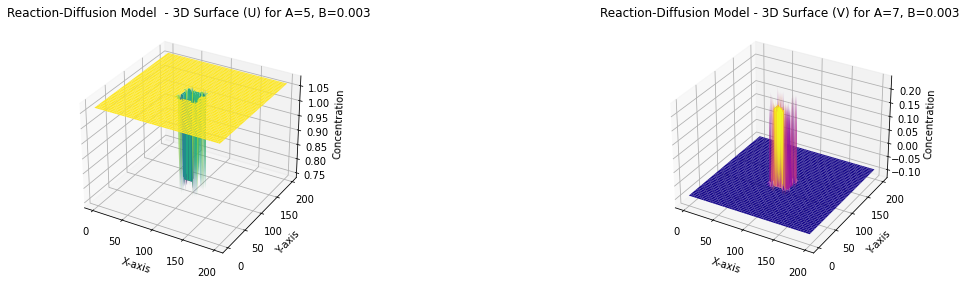

In [167]:
import numpy as np
import matplotlib.pyplot as plt

# functions
def model_start(nx, ny):
    # initial conditions
    u = np.ones((nx, ny))
    v = np.zeros((nx, ny))
    
    # grid
    x, y = np.meshgrid(np.linspace(0, 1, nx), np.linspace(0, 1, ny))

    mask = (0.45 < x) & (x < 0.55) & (0.45 < y) & (y < 0.55)
    
    u[mask] = 0.50
    v[mask] = 0.25
        
    return u, v



# Set 2: Brusselator Model
def f2(u, v, A=5, B=0.003):
    return A-(B+1)*u+(u**2)*v

def g2(u, v, B=0.003):
    return B*u-(u**2)*v


def periodic_bc(u):
    u[0, :] = u[-2, :]
    u[-1, :] = u[1, :]
    u[:, 0] = u[:, -2]
    u[:, -1] = u[:, 1]

def five_point_scheme(u):
    return (u[:-2, 1:-1] + u[1:-1, :-2] - 4*u[1:-1, 1:-1] + u[1:-1, 2:] + u[2:, 1:-1])

def integrate_model(U, V, params, f, g):
    dt, nu1, nu2, F, k = params
    
    u, v = U[1:-1, 1:-1], V[1:-1, 1:-1]
    
    Lu = five_point_scheme(U)
    Lv = five_point_scheme(V)
    
    uvv = f(u, v) * g(u, v)
    u += dt * (nu1 * Lu - uvv + F * (1 - u))
    v += dt * (nu2 * Lv + uvv - (F + k) * v)
    
    periodic_bc(U)
    periodic_bc(V)



# Set 2
f, g = f2, g2

params = np.array([0.55, 0.0355, 0.0555, 0.055545, 0.0625])
U, V = model_start(200, 200)

for t in range(400):
    integrate_model(U, V, params, f, g)

V_scaled = np.uint8(255 * (V - V.min()) / (V.max() - V.min()))

# Plot 2D concentrations
plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
plt.pcolormesh(U, cmap='RdBu')
plt.title('Reaction-Diffusion Model  - Concentration (U) for A=5, B=0.003')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.pcolormesh(V, cmap='RdBu')
plt.title('Reaction-Diffusion Model l - Concentration (V) A=5, B=0.003')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.colorbar()

plt.tight_layout()
plt.show()

# 3D Surface Plots
fig = plt.figure(figsize=(15, 6))

# Concentration (U) - 3D Surface Plot
ax1 = fig.add_subplot(1, 3, 1, projection='3d')
x, y = np.meshgrid(np.arange(U.shape[0]), np.arange(U.shape[1]))
ax1.plot_surface(x, y, U, cmap='viridis')
ax1.set_title('Reaction-Diffusion Model  - 3D Surface (U) for A=5, B=0.003')
ax1.set_xlabel('X-axis')
ax1.set_ylabel('Y-axis')
ax1.set_zlabel('Concentration')

# Concentration (V) - 3D Surface Plot
ax2 = fig.add_subplot(1, 3, 3, projection='3d')
ax2.plot_surface(x, y, V, cmap='plasma')
ax2.set_title('Reaction-Diffusion Model - 3D Surface (V) for A=7, B=0.003')
ax2.set_xlabel('X-axis')
ax2.set_ylabel('Y-axis')
ax2.set_zlabel('Concentration')



plt.show()


# # Simulation for f(u,v)=kA-(B+1)u+u^2v, g(u,v)=Bu-u^2v for A=7,B=0.003(Reaction-Diffusion Model) 


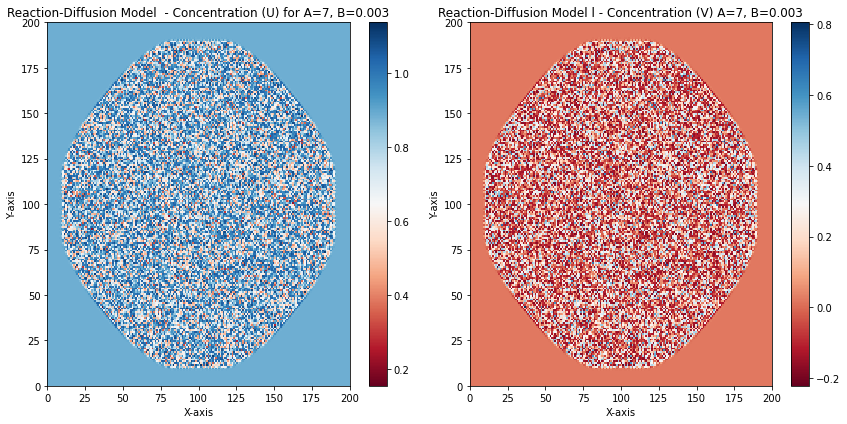

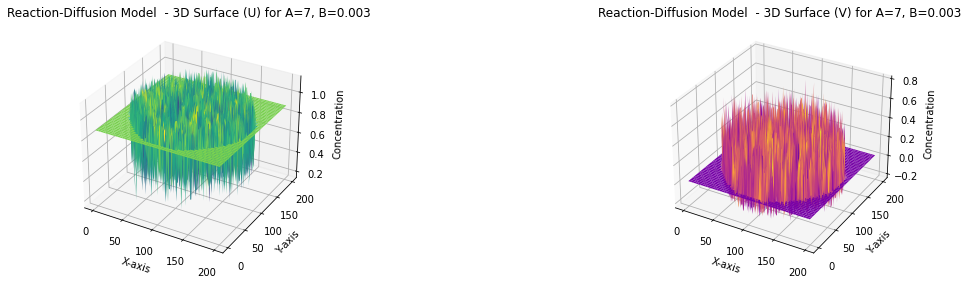

In [168]:
import numpy as np
import matplotlib.pyplot as plt

# functions
def model_start(nx, ny):
    # initial conditions
    u = np.ones((nx, ny))
    v = np.zeros((nx, ny))
    
    # grid
    x, y = np.meshgrid(np.linspace(0, 1, nx), np.linspace(0, 1, ny))

    mask = (0.45 < x) & (x < 0.55) & (0.45 < y) & (y < 0.55)
    
    u[mask] = 0.50
    v[mask] = 0.25
        
    return u, v



# Set 2: Brusselator Model
def f2(u, v, A=7, B=0.003):
    return A-(B+1)*u+(u**2)*v

def g2(u, v, B=0.003):
    return B*u-(u**2)*v


def periodic_bc(u):
    u[0, :] = u[-2, :]
    u[-1, :] = u[1, :]
    u[:, 0] = u[:, -2]
    u[:, -1] = u[:, 1]

def five_point_scheme(u):
    return (u[:-2, 1:-1] + u[1:-1, :-2] - 4*u[1:-1, 1:-1] + u[1:-1, 2:] + u[2:, 1:-1])

def integrate_model(U, V, params, f, g):
    dt, nu1, nu2, F, k = params
    
    u, v = U[1:-1, 1:-1], V[1:-1, 1:-1]
    
    Lu = five_point_scheme(U)
    Lv = five_point_scheme(V)
    
    uvv = f(u, v) * g(u, v)
    u += dt * (nu1 * Lu - uvv + F * (1 - u))
    v += dt * (nu2 * Lv + uvv - (F + k) * v)
    
    periodic_bc(U)
    periodic_bc(V)



# Set 2
f, g = f2, g2

params = np.array([0.55, 0.0355, 0.0555, 0.055545, 0.0625])
U, V = model_start(200, 200)

for t in range(400):
    integrate_model(U, V, params, f, g)

V_scaled = np.uint8(255 * (V - V.min()) / (V.max() - V.min()))

# Plot 2D concentrations
plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
plt.pcolormesh(U, cmap='RdBu')
plt.title('Reaction-Diffusion Model  - Concentration (U) for A=7, B=0.003')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.pcolormesh(V, cmap='RdBu')
plt.title('Reaction-Diffusion Model l - Concentration (V) A=7, B=0.003')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.colorbar()

plt.tight_layout()
plt.show()

# 3D Surface Plots
fig = plt.figure(figsize=(15, 6))

# Concentration (U) - 3D Surface Plot
ax1 = fig.add_subplot(1, 3, 1, projection='3d')
x, y = np.meshgrid(np.arange(U.shape[0]), np.arange(U.shape[1]))
ax1.plot_surface(x, y, U, cmap='viridis')
ax1.set_title('Reaction-Diffusion Model  - 3D Surface (U) for A=7, B=0.003')
ax1.set_xlabel('X-axis')
ax1.set_ylabel('Y-axis')
ax1.set_zlabel('Concentration')

# Concentration (V) - 3D Surface Plot
ax2 = fig.add_subplot(1, 3, 3, projection='3d')
ax2.plot_surface(x, y, V, cmap='plasma')
ax2.set_title('Reaction-Diffusion Model  - 3D Surface (V) for A=7, B=0.003')
ax2.set_xlabel('X-axis')
ax2.set_ylabel('Y-axis')
ax2.set_zlabel('Concentration')



plt.show()
